# Fuzzy Logic for Mood Detection
the goal is to use fuzzy logic to interpret the mood conveyed in a paragraph of text.
- **Fuzzy Set Definition**: Define fuzzy sets for each mood you wish to detect, such as happy, sad, angry, etc. Each set will have a range of values that indicate the degree to which a given text belongs to that mood.

- **Fuzzification of Input**: Transform the words or phrases in your paragraph into fuzzy values. This means assigning a degree of membership to each word for each mood-based fuzzy set. For example, "joyful" may have a high degree of membership in the happy set, while "gloomy" may have a high degree in the sad set.

- **Rule Creation**: Develop rules that handle the combination of these fuzzy values. For instance, if a sentence contains a mix of words that have high membership values for both happy and sad sets, you'll need rules to decide how these combine to give a final mood for the sentence.

- **Context Analysis**: Context plays a crucial role in determining mood. The same word can convey different moods depending on its context. For instance, "killed it" could mean something very positive in one context (e.g., a performance) and something negative in another. Rules should account for such variations.

- **Inference Engine**: Apply these rules to the fuzzified inputs to infer the mood of the paragraph. This is the engine of your fuzzy logic system, where the magic happens – taking your input values and rules, and using them to determine the mood.

- **Defuzzification**: Finally, convert the fuzzy inferences into a single, crisp output. This could be a single mood label or a composite score that reflects the paragraph's overall mood.

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Let's create a lexicon:

In [2]:
# Define the lexicon with mood vectors
lexicon = {
    "frustrated": {"Angry": 0.8, "Worried": 0.4, "Sad": 0.3, "Calm": 0, "Happy": 0, "Excited": 0},
    "anxious": {"Angry": 0.3, "Worried": 0.9, "Sad": 0.4, "Calm": 0, "Happy": 0, "Excited": 0.1},
    "disappointed": {"Angry": 0.5, "Worried": 0.3, "Sad": 0.8, "Calm": 0.1, "Happy": 0, "Excited": 0},
    "peaceful": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 1, "Happy": 0.4, "Excited": 0.2},
    "joyful": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 0.2, "Happy": 0.9, "Excited": 0.7},
    "thrilled": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 0, "Happy": 0.6, "Excited": 1},
    "irate": {"Angry": 0.9, "Worried": 0.2, "Sad": 0.1, "Calm": 0, "Happy": 0, "Excited": 0},
    "nervous": {"Angry": 0.2, "Worried": 0.8, "Sad": 0.3, "Calm": 0.1, "Happy": 0, "Excited": 0.2},
    "melancholy": {"Angry": 0.1, "Worried": 0.4, "Sad": 0.9, "Calm": 0.2, "Happy": 0, "Excited": 0},
    "serene": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 0.9, "Happy": 0.8, "Excited": 0.9},
    "elated": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 0.1, "Happy": 0.8, "Excited": 0.9},
    "ecstatic": {"Angry": 0, "Worried": 0, "Sad": 0, "Calm": 0, "Happy": 0.7, "Excited": 1}
    }

In [3]:
# Sample text
text = "The serene atmosphere of the park made everyone feel peaceful. Amidst this tranquility, one could spot an irate man arguing over the phone, his frustration evident. Nearby, a nervous child clung to her mother, anxious about her first day at school. In contrast, a group of friends shared joyful laughter, clearly elated by their reunion. An elderly man sat alone on a bench, his melancholy gaze fixed on the distant horizon. Amidst the crowd, a serene monk walked by, his calm demeanor unaffected by the surrounding chaos. In the midst of these varied emotions, an ecstatic artist completed his masterpiece, thrilled by the outcome."

# Convert text to lowercase and split into words
words = text.lower().split()


In [4]:
# Initialize a dictionary to store the results
mood_vectors = {}

# Iterate through words to identify and store words present in the lexicon
for word in words:
    cleaned_word = word.strip('.,')
    if cleaned_word in lexicon:
        mood_vectors[cleaned_word] = lexicon[cleaned_word]

# mood_vectors now contains the words and their associated mood vectors
for word, moods in mood_vectors.items():
    print(f"Word: '{word}', Moods: {moods}")

Word: 'serene', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 'Calm': 0.9, 'Happy': 0.8, 'Excited': 0.9}
Word: 'peaceful', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 'Calm': 1, 'Happy': 0.4, 'Excited': 0.2}
Word: 'irate', Moods: {'Angry': 0.9, 'Worried': 0.2, 'Sad': 0.1, 'Calm': 0, 'Happy': 0, 'Excited': 0}
Word: 'nervous', Moods: {'Angry': 0.2, 'Worried': 0.8, 'Sad': 0.3, 'Calm': 0.1, 'Happy': 0, 'Excited': 0.2}
Word: 'anxious', Moods: {'Angry': 0.3, 'Worried': 0.9, 'Sad': 0.4, 'Calm': 0, 'Happy': 0, 'Excited': 0.1}
Word: 'joyful', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 'Calm': 0.2, 'Happy': 0.9, 'Excited': 0.7}
Word: 'elated', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 'Calm': 0.1, 'Happy': 0.8, 'Excited': 0.9}
Word: 'melancholy', Moods: {'Angry': 0.1, 'Worried': 0.4, 'Sad': 0.9, 'Calm': 0.2, 'Happy': 0, 'Excited': 0}
Word: 'ecstatic', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 'Calm': 0, 'Happy': 0.7, 'Excited': 1}
Word: 'thrilled', Moods: {'Angry': 0, 'Worried': 0, 'Sad': 0, 

## Fuzzy set definition:

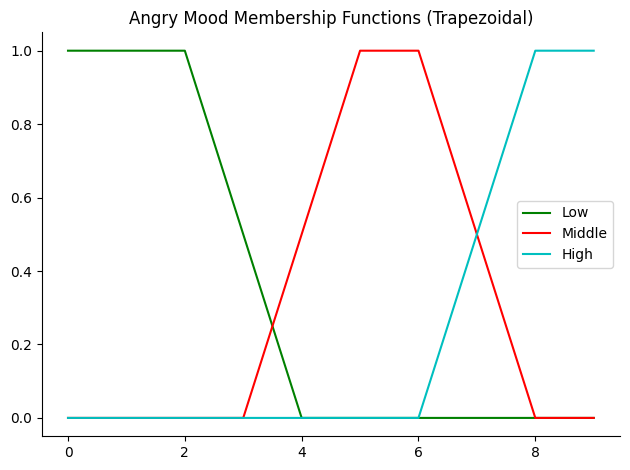

In [7]:
# Define the universe of discourse for the "Angry" mood
x_angry = np.arange(0,10,1)

# Define trapezoidal membership functions for "Angry"
angry_low = fuzz.trapmf(x_angry, [0, 0, 2, 4])
angry_middle = fuzz.trapmf(x_angry, [3, 5, 6, 8])
angry_high = fuzz.trapmf(x_angry, [6, 8, 10, 10])

# Plotting the membership functions
fig, ax = plt.subplots()

ax.plot(x_angry, angry_low, 'g', linewidth=1.5, label='Low')
ax.plot(x_angry, angry_middle, 'r', linewidth=1.5, label='Middle')
ax.plot(x_angry, angry_high, 'c', linewidth=1.5, label='High')

ax.set_title('Angry Mood Membership Functions (Trapezoidal)')
ax.legend()

# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

plt.show()

## Lets define rules:

First, define set universe of discourse:

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
emotion_intensity = np.arange(0, 11, 1)  # This could represent 0 to 10 scale of intensity
output_score = np.arange(-10, 11, 1)     # This could represent a score from -10 (Highly Negative) to 10 (Highly Positive)

print(emotion_intensity)
print(output_score)


[ 0  1  2  3  4  5  6  7  8  9 10]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [4]:
import random

popular_names = [
    "Liam", "Olivia", "Noah", "Emma", "Oliver", "Ava", "William", "Sophia", "Elijah", "Isabella",
    "James", "Mia", "Benjamin", "Charlotte", "Lucas", "Amelia", "Henry", "Harper", "Alexander", "Evelyn",
    "Mason", "Abigail", "Michael", "Emily", "Ethan", "Elizabeth", "Daniel", "Avery", "Jacob", "Sofia",
    "Logan", "Ella", "Jackson", "Madison", "Sebastian", "Scarlett", "Jack", "Grace", "Aiden", "Chloe",
    "Owen", "Camila", "Samuel", "Penelope", "Matthew", "Luna", "Joseph", "Layla", "Levi", "Riley",
    "David", "Nora", "John", "Zoey", "Wyatt", "Mila", "Luke", "Eleanor", "Carter", "Hannah",
    "Jayden", "Addison", "Dylan", "Lily", "Grayson", "Ellie", "Gabriel", "Natalie", "Isaac", "Aubrey",
    "Lincoln", "Leah", "Anthony", "Violet", "Ryan", "Stella", "Nathan", "Hazel", "Isaiah", "Zoe",
    "Andrew", "Lillian", "Thomas", "Lucy", "Joshua", "Aria", "Christopher", "Anna", "Hunter", "Samantha",
    "Christian", "Nora", "Mateo", "Willow", "Colton", "Hailey", "Eli", "Nova", "Aaron", "Elena"
]

popular_family_names = [
    "Smith", "Johnson", "Williams", "Brown", "Jones", "Miller", "Davis", "Garcia", "Rodriguez", "Martinez",
    "Hernandez", "Lopez", "Gonzalez", "Wilson", "Anderson", "Thomas", "Taylor", "Moore", "Jackson", "Martin",
    "Lee", "Perez", "Thompson", "White", "Harris", "Sanchez", "Clark", "Ramirez", "Lewis", "Robinson",
    "Walker", "Young", "Allen", "King", "Wright", "Scott", "Torres", "Nguyen", "Hill", "Flores", "Green",
    "Adams", "Nelson", "Baker", "Hall", "Rivera", "Campbell", "Mitchell", "Carter", "Roberts", "Gomez",
    "Phillips", "Evans", "Turner", "Diaz", "Parker", "Cruz", "Edwards", "Collins", "Reyes", "Stewart",
    "Morris", "Morales", "Murphy", "Cook", "Rogers", "Gutierrez", "Ortiz", "Morgan", "Cooper", "Peterson",
    "Bailey", "Reed", "Kelly", "Howard", "Ramos", "Kim", "Cox", "Ward", "Richardson", "Watson", "Brooks",
    "Chavez", "Wood", "James", "Bennett", "Gray", "Mendoza", "Ruiz", "Hughes", "Price", "Alvarez", "Castillo",
    "Sanders", "Patel", "Myers", "Long", "Ross", "Foster", "Jimenez"
]

generated_names = []
generated_emails = []

for i in range(500):
    name = random.choice(popular_names)
    surname = random.choice(popular_family_names)
    generated_names.append("{} {}".format(name, surname))
    generated_emails.append("{}_{}@gmail.com".format(name, surname))

sql_query = 'CREATE TABLE Users ( UserId int IDENTITY(1,1) PRIMARY KEY, UserName nvarchar(max), Email nvarchar(max) ); '
for i in range(500):
    sql_query += "insert into Users (UserName, Email) values ('{}', '{}'); ".format(generated_names[i], generated_emails[i])

print(sql_query)

CREATE TABLE Users ( UserId int IDENTITY(1,1) PRIMARY KEY, UserName nvarchar(max), Email nvarchar(max) ); insert into Users (UserName, Email) values ('Mateo Smith', 'Mateo_Smith@gmail.com'); insert into Users (UserName, Email) values ('Luke Johnson', 'Luke_Johnson@gmail.com'); insert into Users (UserName, Email) values ('Lincoln Rogers', 'Lincoln_Rogers@gmail.com'); insert into Users (UserName, Email) values ('Owen Cruz', 'Owen_Cruz@gmail.com'); insert into Users (UserName, Email) values ('Aubrey Diaz', 'Aubrey_Diaz@gmail.com'); insert into Users (UserName, Email) values ('Gabriel Ross', 'Gabriel_Ross@gmail.com'); insert into Users (UserName, Email) values ('Samuel Price', 'Samuel_Price@gmail.com'); insert into Users (UserName, Email) values ('Madison Morris', 'Madison_Morris@gmail.com'); insert into Users (UserName, Email) values ('Mateo Watson', 'Mateo_Watson@gmail.com'); insert into Users (UserName, Email) values ('Anthony Myers', 'Anthony_Myers@gmail.com'); insert into Users (UserN

In [ ]:
rules_tensor_test = [
    'angry high or happy low then high_negative',
    'angry low and happy high then neutral',
    'angry medium or happy medium then high_negative',
    'angry high and worried high then neutral',
    'angry medium and worried medium then high_negative',
    'angry low and worried low then neutral',
    'sad high and calm low then high_negative',
    'sad medium and calm medium then neutral',
    'sad low and calm high then high_negative',
    'happy high and excited high then neutral',
    'happy medium and excited medium then high_negative',
    'happy low and excited low then neutral',
    'angry high and happy low then high_negative',
    'angry low and happy high then neutral',
    'worried high and excited high then high_negative',
    'worried low and excited low then neutral',
    'sad high and excited low then high_negative',  
    'sad low and excited low then neutral',
    'angry high and calm high then high_negative',
    'angry high and calm low then neutral',
    'angry low and calm high then high_negative',
    'worried high and happy high then neutral',
    'worried high and happy low then high_negative',
    'worried low and happy high then neutral',
    'sad high and excited high then high_negative',
    'sad high and excited low then neutral',
    'sad low and excited high then high_negative',
    'calm high and excited high then high_negative',
    'calm high and excited low then neutral',
    'calm low and excited high then high_negative',
    'angry high and sad high then high_negative',
    'angry low and sad low then neutral',
    'angry high and sad low then high_negative',
    'happy high and worried high then neutral',
    'happy high and worried low then high_negative',
    'happy low and worried high then neutral']